# **Proyek Analisis Data: [Bike Sharing Dataset]**
- **Nama:** [Intan Meilyana]
- **Email:** [M200D4KX1861@bangkit.academy]
- **ID Dicoding:** [meilyanaintan24]

## **Menentukan Pertanyaan Bisnis**

- Bagaimana pola trend penyewaan sepeda setiap bulannya?
- Seberapa banyak jumlah total sepeda yang disewakan setiap musimnya?
- Bagaimana perbedaan jumlah penyewaan sepeda pada saat libur dengan hari biasa?

## **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
day_df = pd.read_csv('/content/drive/My Drive/Bike sharing/day.csv')
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
hour_df = pd.read_csv('/content/drive/My Drive/Bike sharing/hour.csv')
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

**Menilai tabel day_df**

In [ ]:
# Mencari informasi terkait penyewaan sepeda dalam hitungan harian
# Dalam hal ini saya beri nama day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi di atas, kita dapat mengetahui bahwa dataset day_df memiliki 16 variabel dalam 16 kolom tersebut dan 731 nilai non-null dalam setiap variabelnya. Kemudian kita juga dapat mengetahui tipe datanya, yaitu terdapat 4 variabel dengan tipe data float64, lalu sebanyaknya 11 variabel dengan tipe data int64. Selain itu, kita juga menemukan adanya kesalahan pada data, dimana pada variabel dteday seharusnya merupakan tipe data datetime64, namun di atas tertulis object. Sehingga pada proses cleaning data nantinya akan dilakukan convert tipe data dteday.

In [ ]:
# Mengecek missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa tidak terdapat missing value pada masing-masing variabel.

In [ ]:
# Mengecek duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat data yang duplikasi pada dataset daily bike sharing (day_df).

In [ ]:
# Statistik deskriptif daily sharing bike (day_df)
day_df.describe(include="all")

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

Pada file readme telah dijelaskan bahwa variabel "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data sehingga nilai data yang ditampilkan memiliki range yang berbeda dengan data aslinya. Jadi, dalam statistik deskriptif di atas tidak terdapat kejanggalan pada setiap variabelnya.

**Menilai tabel hour_df**

In [ ]:
# Mencari informasi terkait penyewaan sepeda dalam hitungan jam
# Dalam hal ini saya beri nama hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Berdasarkan informasi di atas, kita dapat mengetahui bahwa dataset hour_df memiliki 17 variabel dalam 17 kolom tersebut dan 17379 nilai non-null dalam setiap variabelnya. Kemudian kita juga dapat mengetahui tipe datanya, yaitu terdapat 4 variabel dengan tipe data float64, lalu sebanyaknya 12 variabel dengan tipe data int64. Selain itu, kita juga menemukan adanya kesalahan pada data, dimana pada variabel dteday seharusnya merupakan tipe data datetime64, namun di atas tertulis object. Sehingga pada proses cleaning data nantinya akan dilakukan convert tipe data dteday.

In [ ]:
# Mengecek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa tidak terdapat missing value pada masing-masing variabel.

In [ ]:
# Mengecek adanya duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat data yang duplikasi pada dataset hourly bike sharing (hour_df)

In [ ]:
# Statistik deskriptif hourly sharing bike (hour_df)
hour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

Pada file readme telah dijelaskan bahwa variabel "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data sehingga nilai data yang ditampilkan memiliki range yang berbeda dengan data aslinya. Jadi, dalam statistik deskriptif di atas tidak terdapat kejanggalan pada setiap variabelnya.

### Cleaning Data

Pada proses cleaning data ini, kita akan memperbaiki tipe data pada variabel "dteday" menjadi datetime dikedua dataframe

In [ ]:
# Mengubah tipe data dteday yang awalnya object menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat bahwa tipe data dteday sudah berubah menjadi datetime64.

In [ ]:
# Mengubah tipe data dteday yang awalnya object menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Terlihat bahwa tipe data dteday sudah berubah menjadi datetime64.

## **Exploratory Data Analysis (EDA)**

### Explore day_df

**Pertama, kita akan mengeksplorasi bentuk distribusi data yang terjadi pada data bike per day (day_df).**

In [ ]:
# Mengecek distribusi variabel dengan tipe data kategorik
day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [ ]:
categorical_data_day = day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

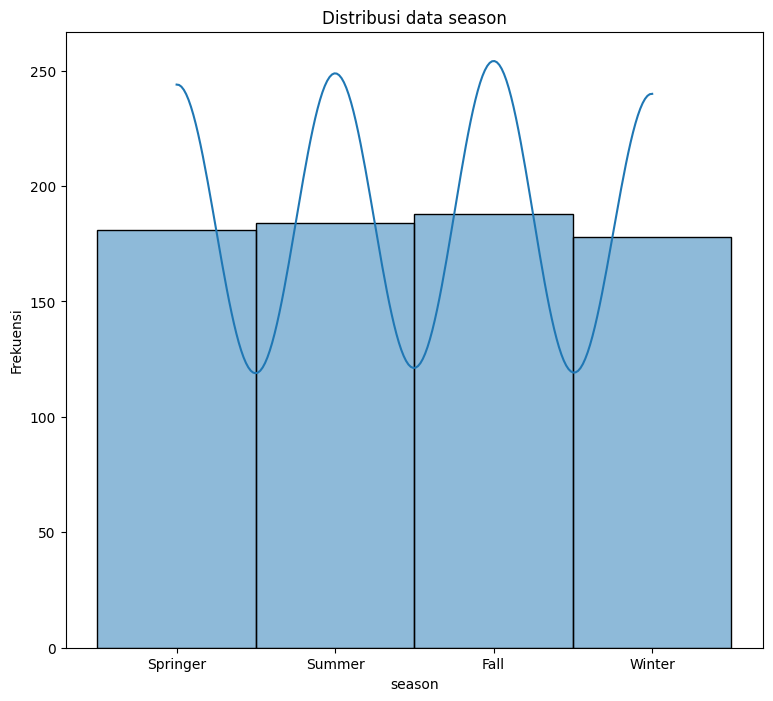

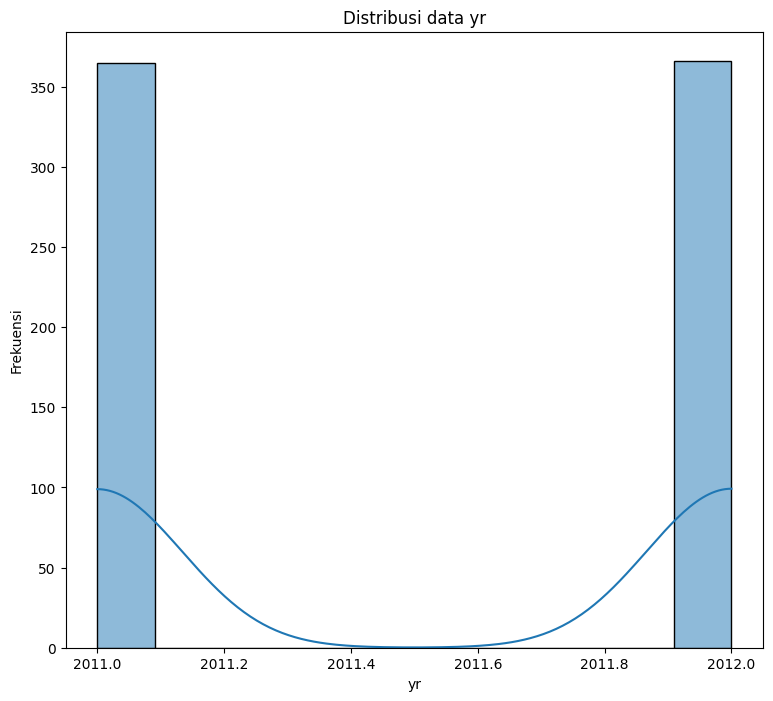

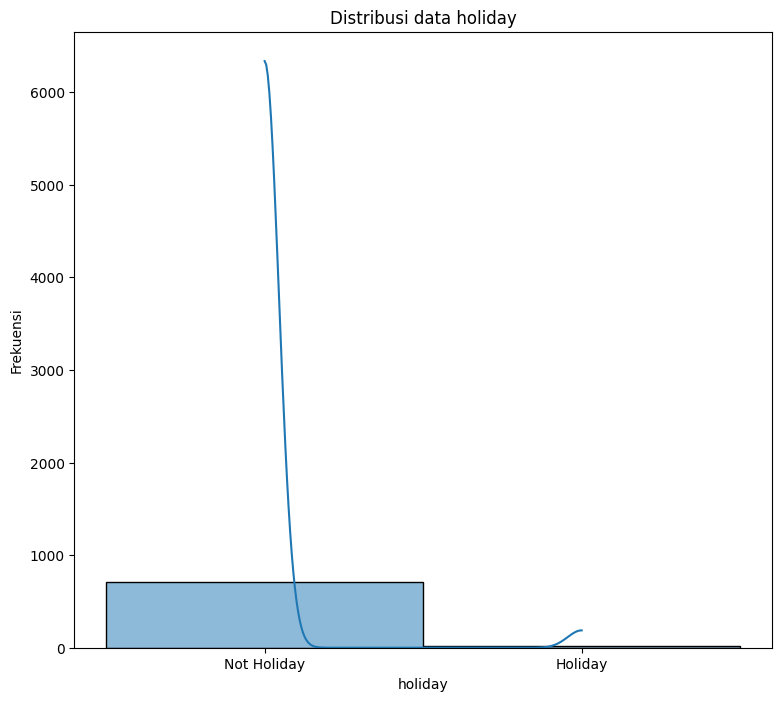

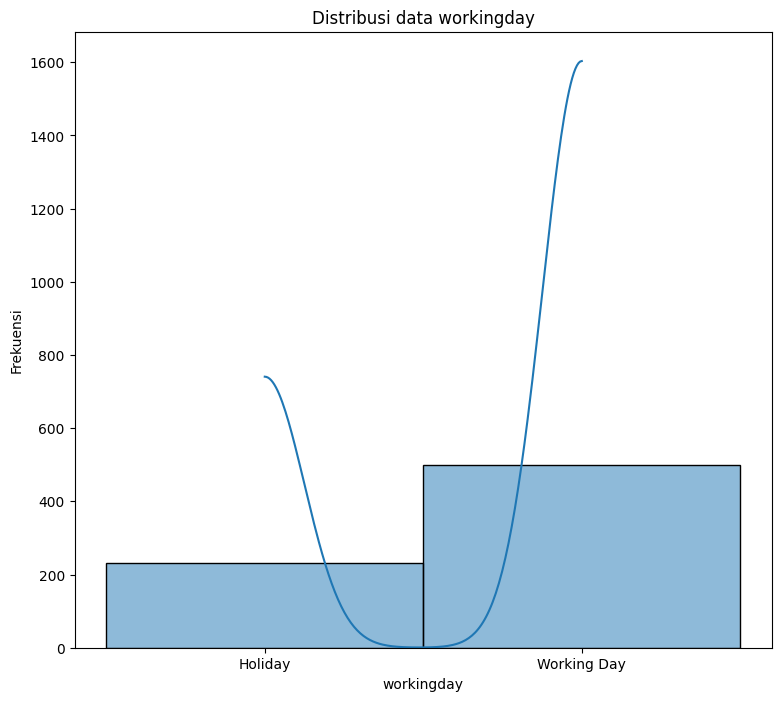

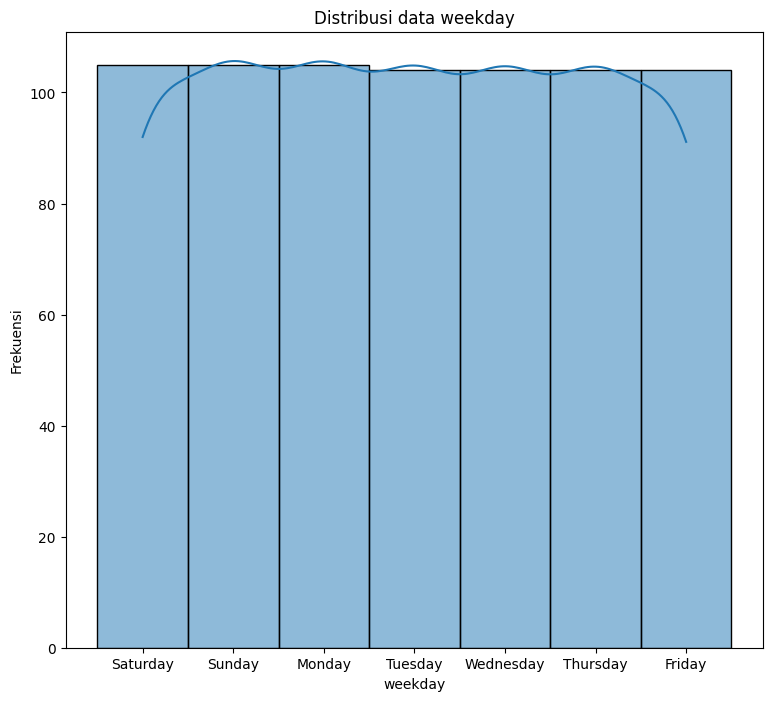

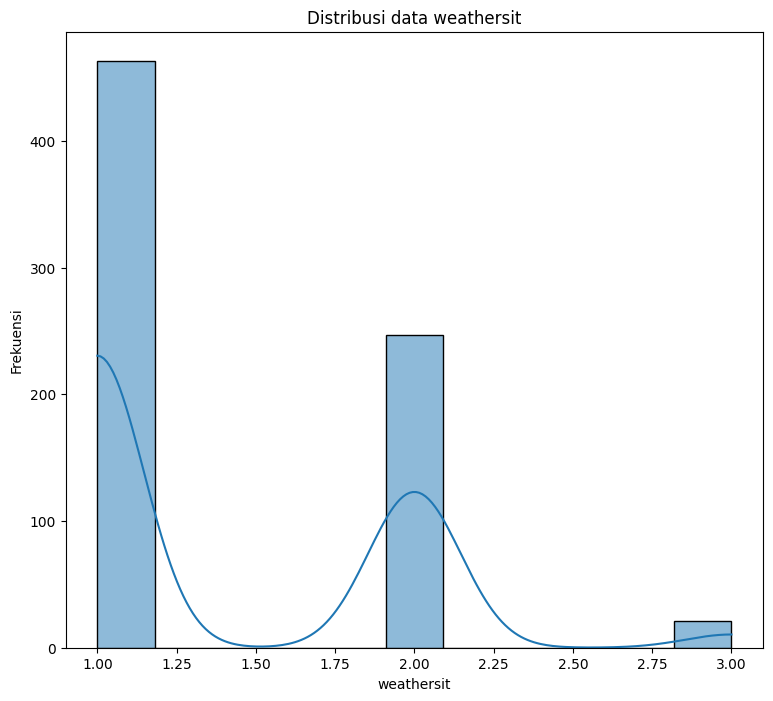

In [ ]:
for column in categorical_data_day.columns:
    plt.figure(figsize=(9, 8))
    sns.histplot(categorical_data_day, x=column, kde=True)
    plt.title(f"Distribusi data {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

Dari eksplorasi data di atas, diperoleh informasi distribusi data sebagai berikut:
- Variabel Season dan yr terdeteksi No Skewed.
- Variabel Holiday memiliki bentuk histogram Right Skewed Distribution.
- Variabel Workingday memiliki bentuk histogram Left Skewed Distribution.
- Variabel Weathersit memiliki bentuk histogram Right Skewed Distribution.

In [ ]:
# Mengecek distribusi variabel dengan tipe data numerik
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)

In [ ]:
num_data_day = day_df[["temp","atemp","hum","windspeed"]]

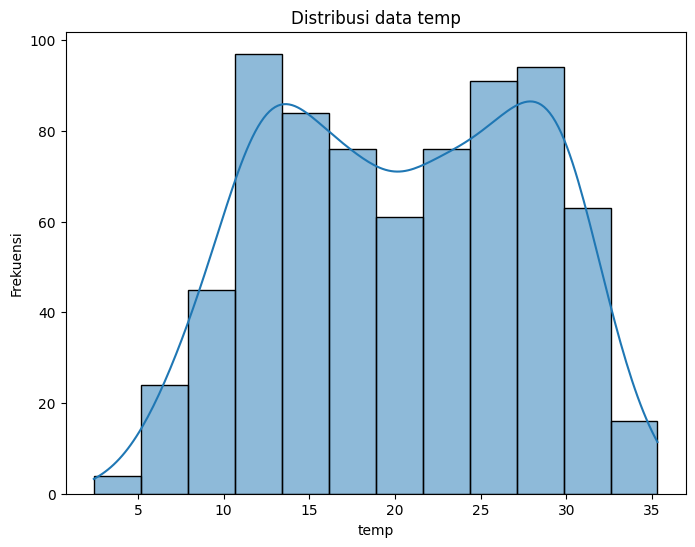

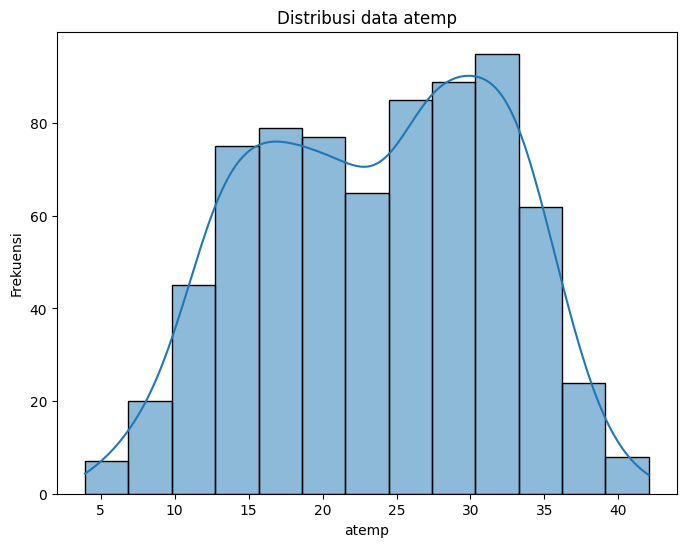

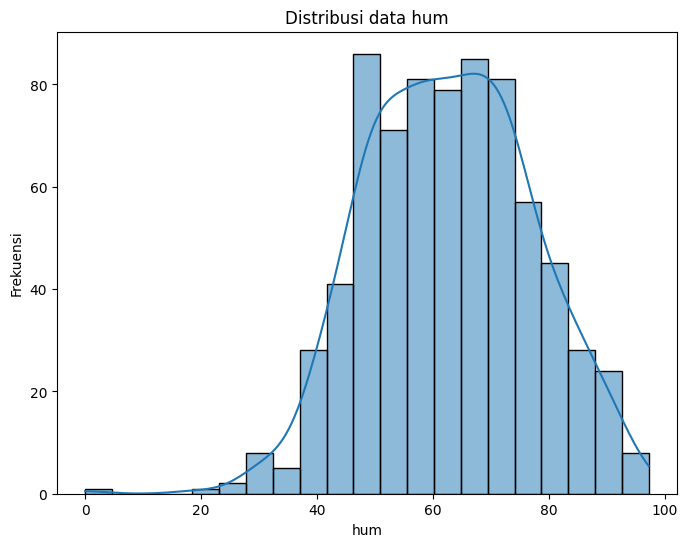

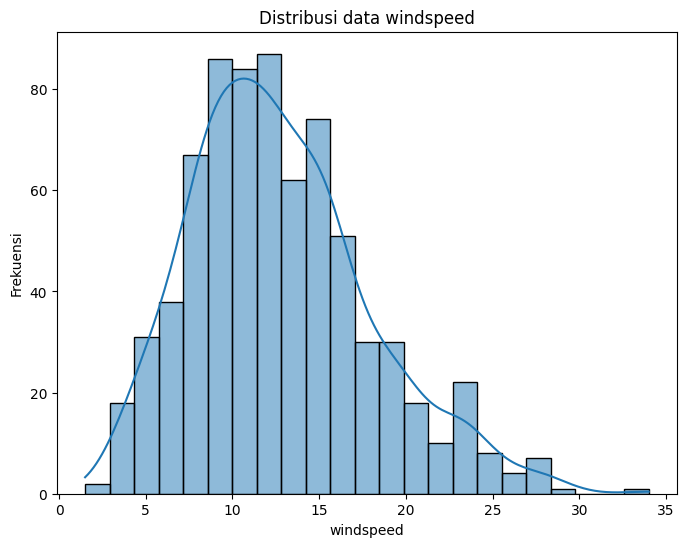

In [ ]:
for column in num_data_day.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(num_data_day, x=column, kde=True)
    plt.title(f"Distribusi data {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

Dari eksplorasi data di atas, diperoleh informasi distribusi data sebagai berikut:

- Variabel temp, atempt, dan weathersit terdeteksi memiliki bentuk histogram Left Skewed Distribution.
- Variabel windspeed memiliki bentuk histogram Right Skewed Distribution.

**Kedua, kita akan melihat bagaimana korelasi antar variabel di dataframe bike per day tersebut (day_df)**

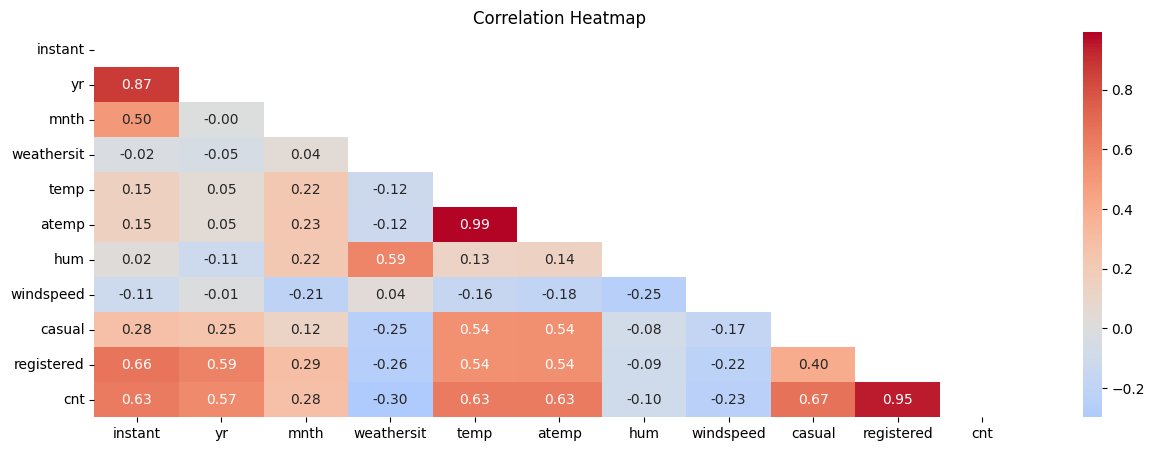

In [ ]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Terlihat bahwa korelasi kuat positif ada pada variabel:
- tempt dengan atemp
- registered dengan cnt
- instant dengan yr

**Selanjutnya kita akan melihat bagaimana hubungan antar variabel di dataframe tersebut melalui Scatter Plot.**

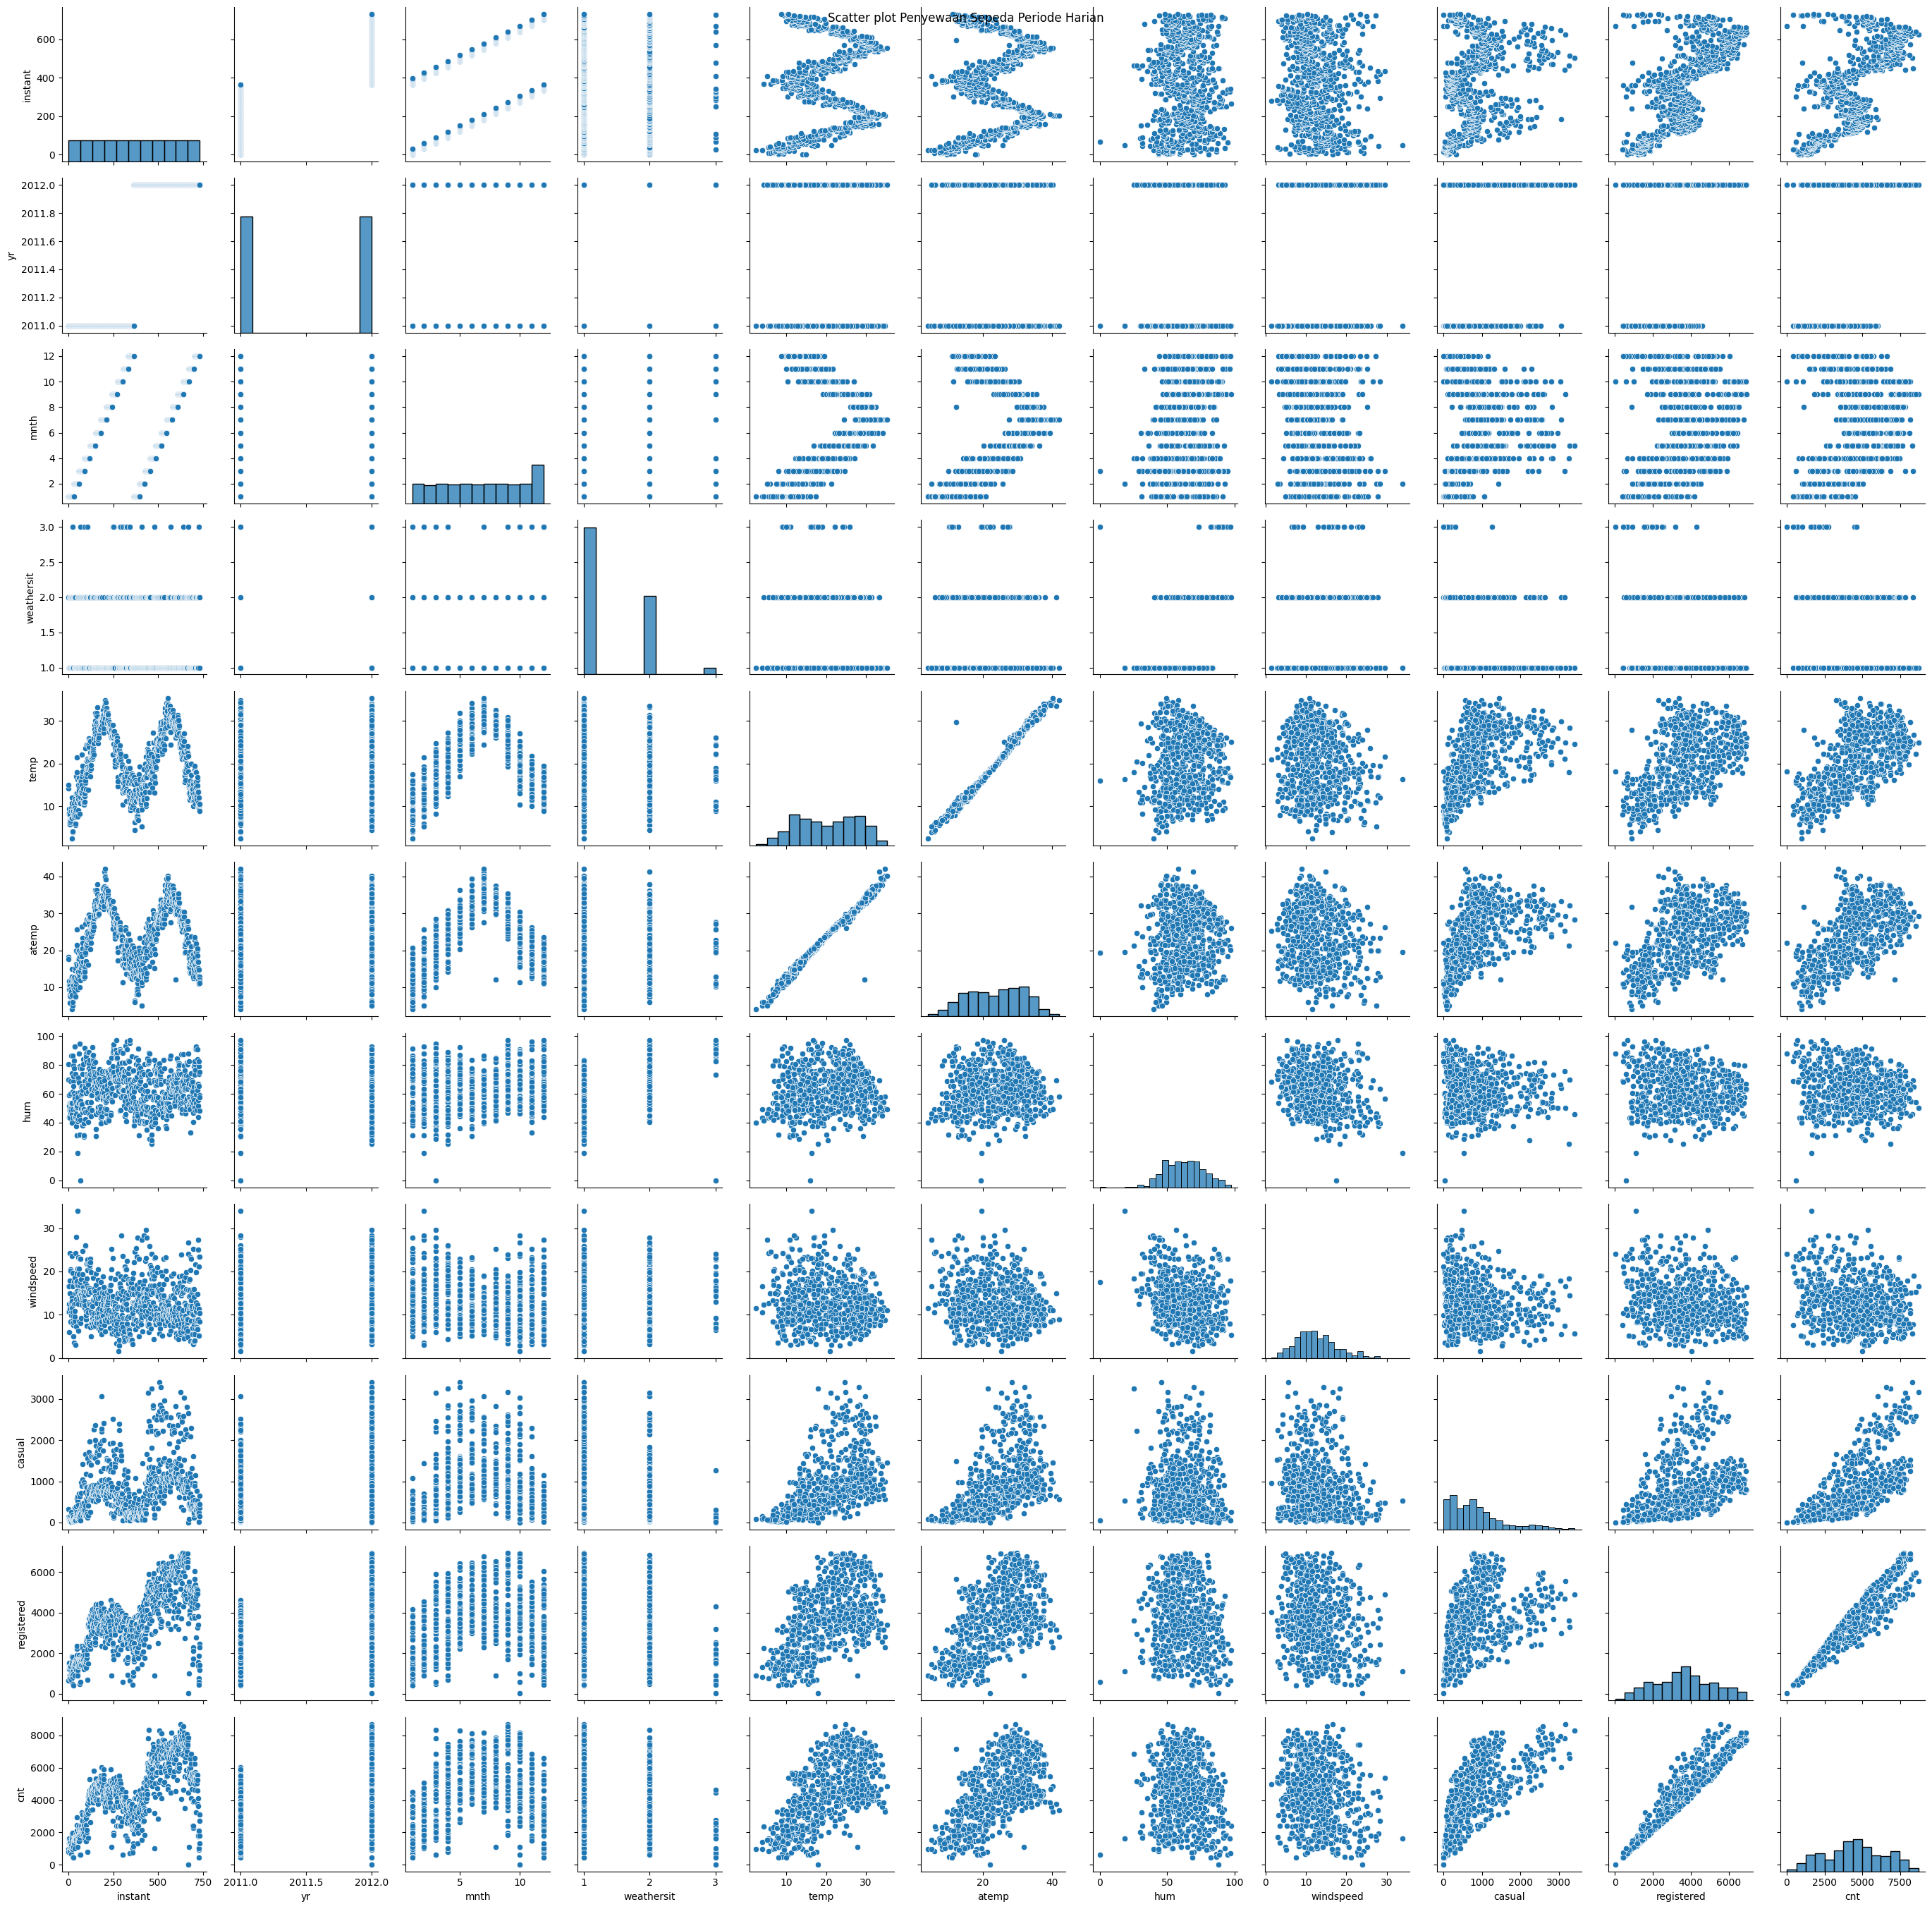

In [ ]:
g = sns.pairplot(day_df)
g.fig.suptitle("Scatter plot Penyewaan Sepeda Periode Harian")
plt.tight_layout()
plt.show()

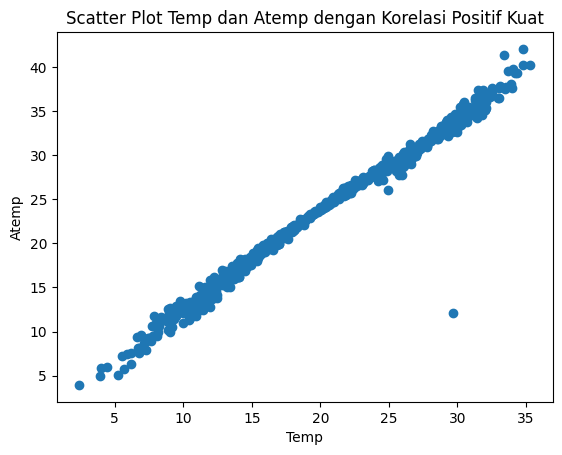

In [ ]:
# Scatter plot variabel Temp dan Attempt dengan korelasi positive kuat
plt.scatter(day_df["temp"], day_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot Temp dan Atemp dengan Korelasi Positif Kuat")
plt.show()

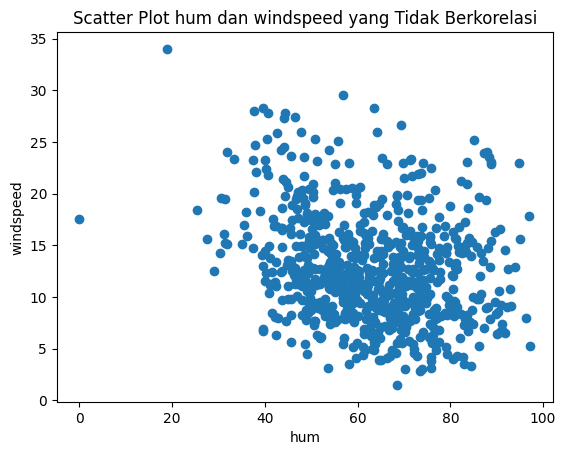

In [ ]:
# Scatter plot varabel yang tidak memiliki korelasi (hum dan windspeed)
plt.scatter(day_df["hum"], day_df["windspeed"])
plt.xlabel("hum")
plt.ylabel("windspeed")
plt.title("Scatter Plot hum dan windspeed yang Tidak Berkorelasi")
plt.show()

In [ ]:
# Mengecek distribusi data bertipe kategorik
hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [ ]:
categorical_data_hour = hour_df[["season","yr","holiday","workingday","weekday","weathersit"]]

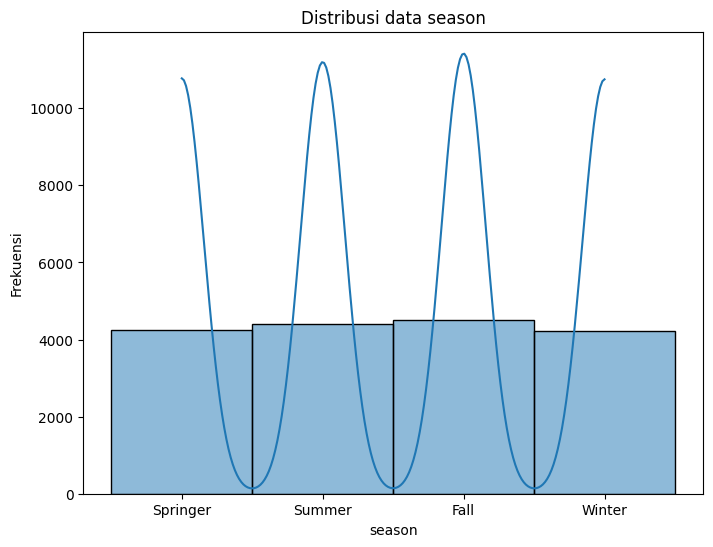

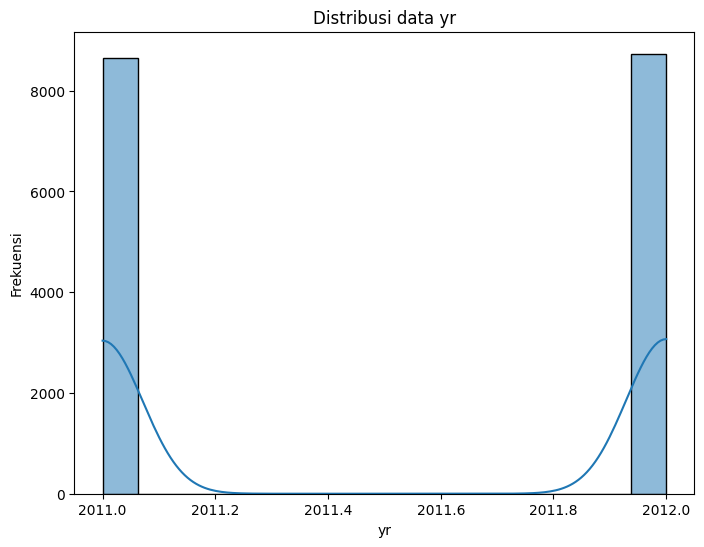

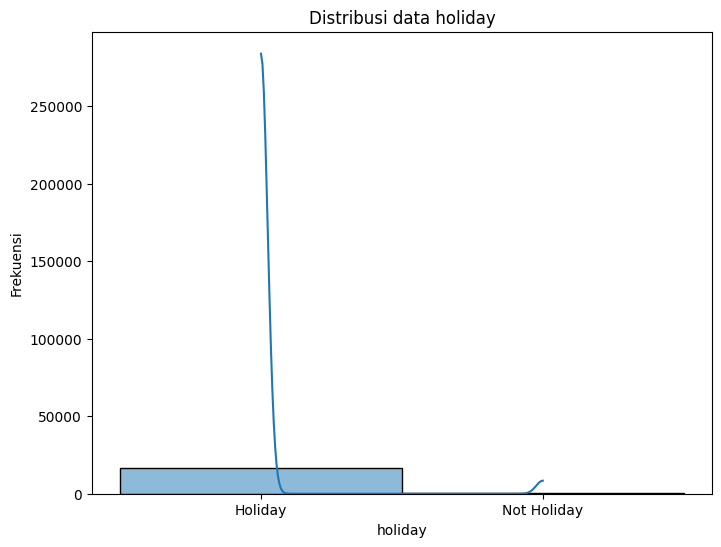

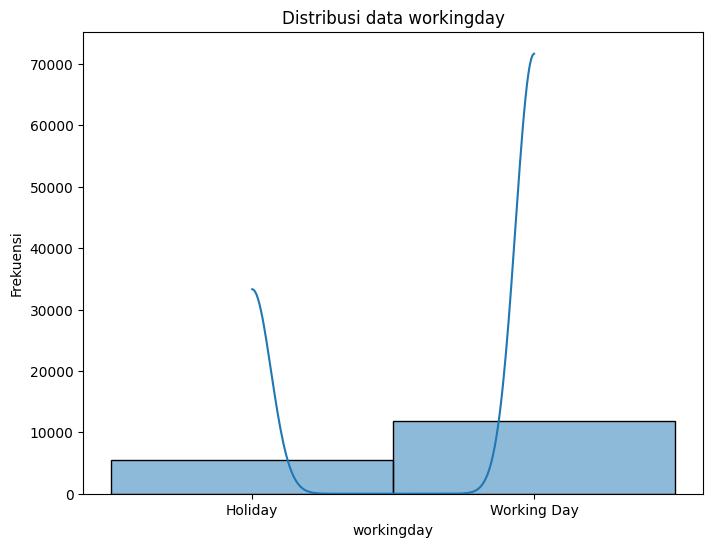

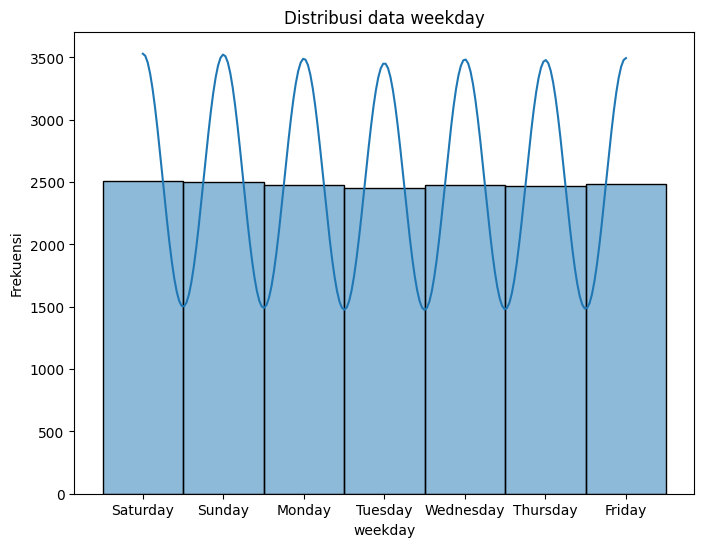

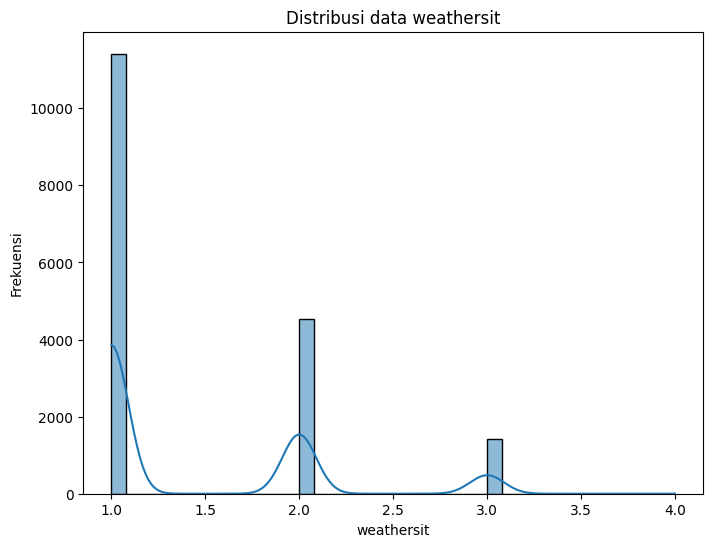

In [ ]:
for column in categorical_data_hour.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(categorical_data_hour, x=column, kde=True)
    plt.title(f"Distribusi data {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

Dari eksplorasi data di atas, diperoleh informasi distribusi data sebagai berikut:

- Variabel Season dan yr terdeteksi No Skewed.
- Variabel Holiday memiliki bentuk histogram Right Skewed Distribution.
- Variabel Workingday memiliki bentuk histogram Left Skewed Distribution.
- Variabel Weathersit memiliki bentuk histogram Right Skewed Distribution.

In [ ]:
# Mengecek distribusi data bertipe numerik
hour_df["temp"] = hour_df["temp"].multiply(41)
hour_df["atemp"] = hour_df["atemp"].multiply(50)
hour_df["hum"] = hour_df["hum"].multiply(100)
hour_df["windspeed"] = hour_df["windspeed"].multiply(67)

In [ ]:
num_data_hour = hour_df[["temp","atemp","hum","windspeed"]]

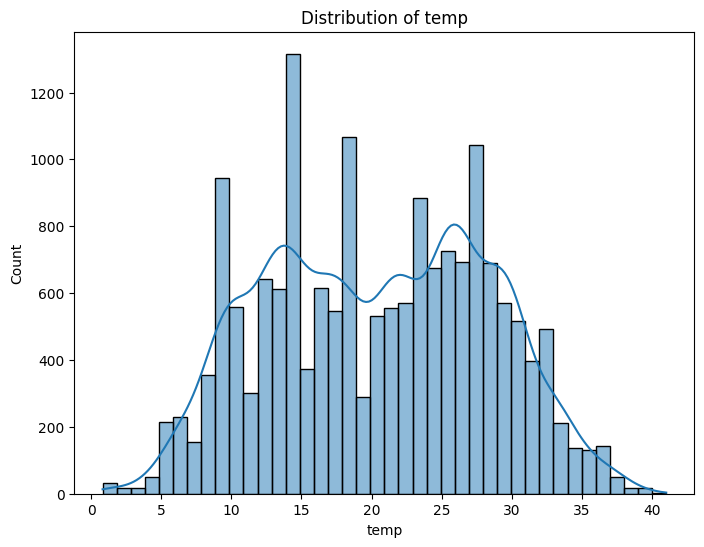

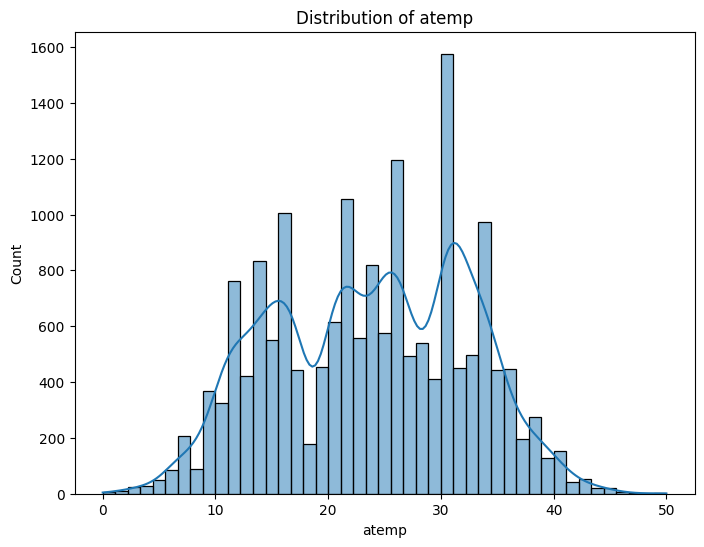

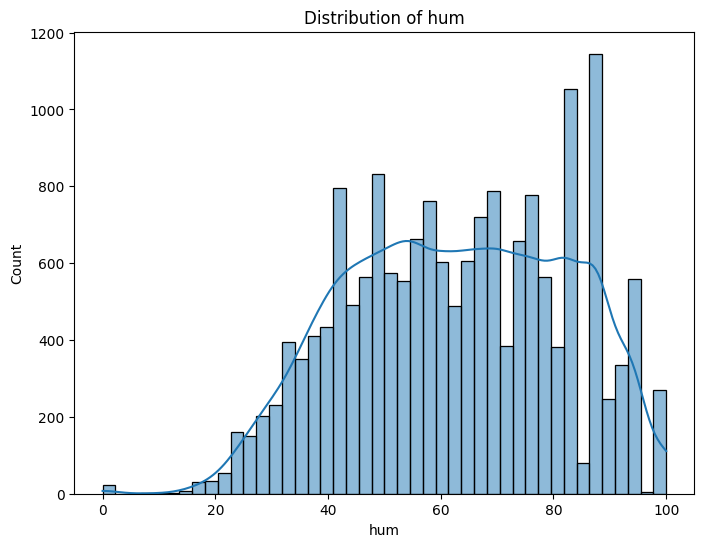

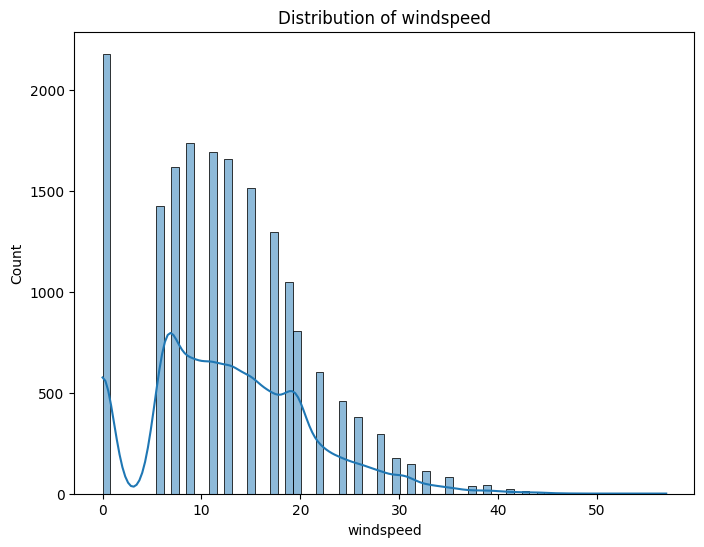

In [ ]:
for column in num_data_hour.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=num_data_hour, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Dari eksplorasi data di atas, diperoleh informasi distribusi data sebagai berikut:

Variabel temp, atempt, dan weathersit terdeteksi memiliki bentuk histogram Left Skewed Distribution.
Variabel windspeed memiliki bentuk histogram Right Skewed Distribution.

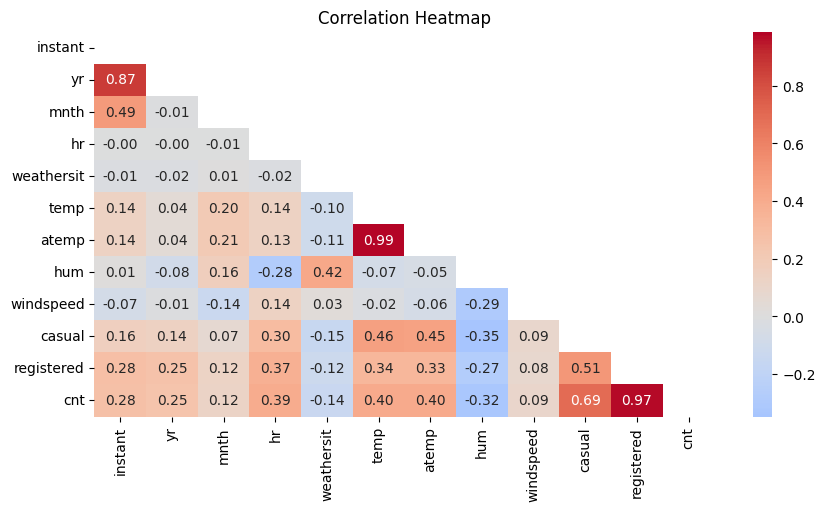

In [ ]:
# Mengecek korelasi antar variabel
fig, axe = plt.subplots(figsize=(10,5))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Terlihat bahwa korelasi kuat positif ada pada variabel:

- tempt dengan atemp
- registered dengan cnt
- instant dengan yr

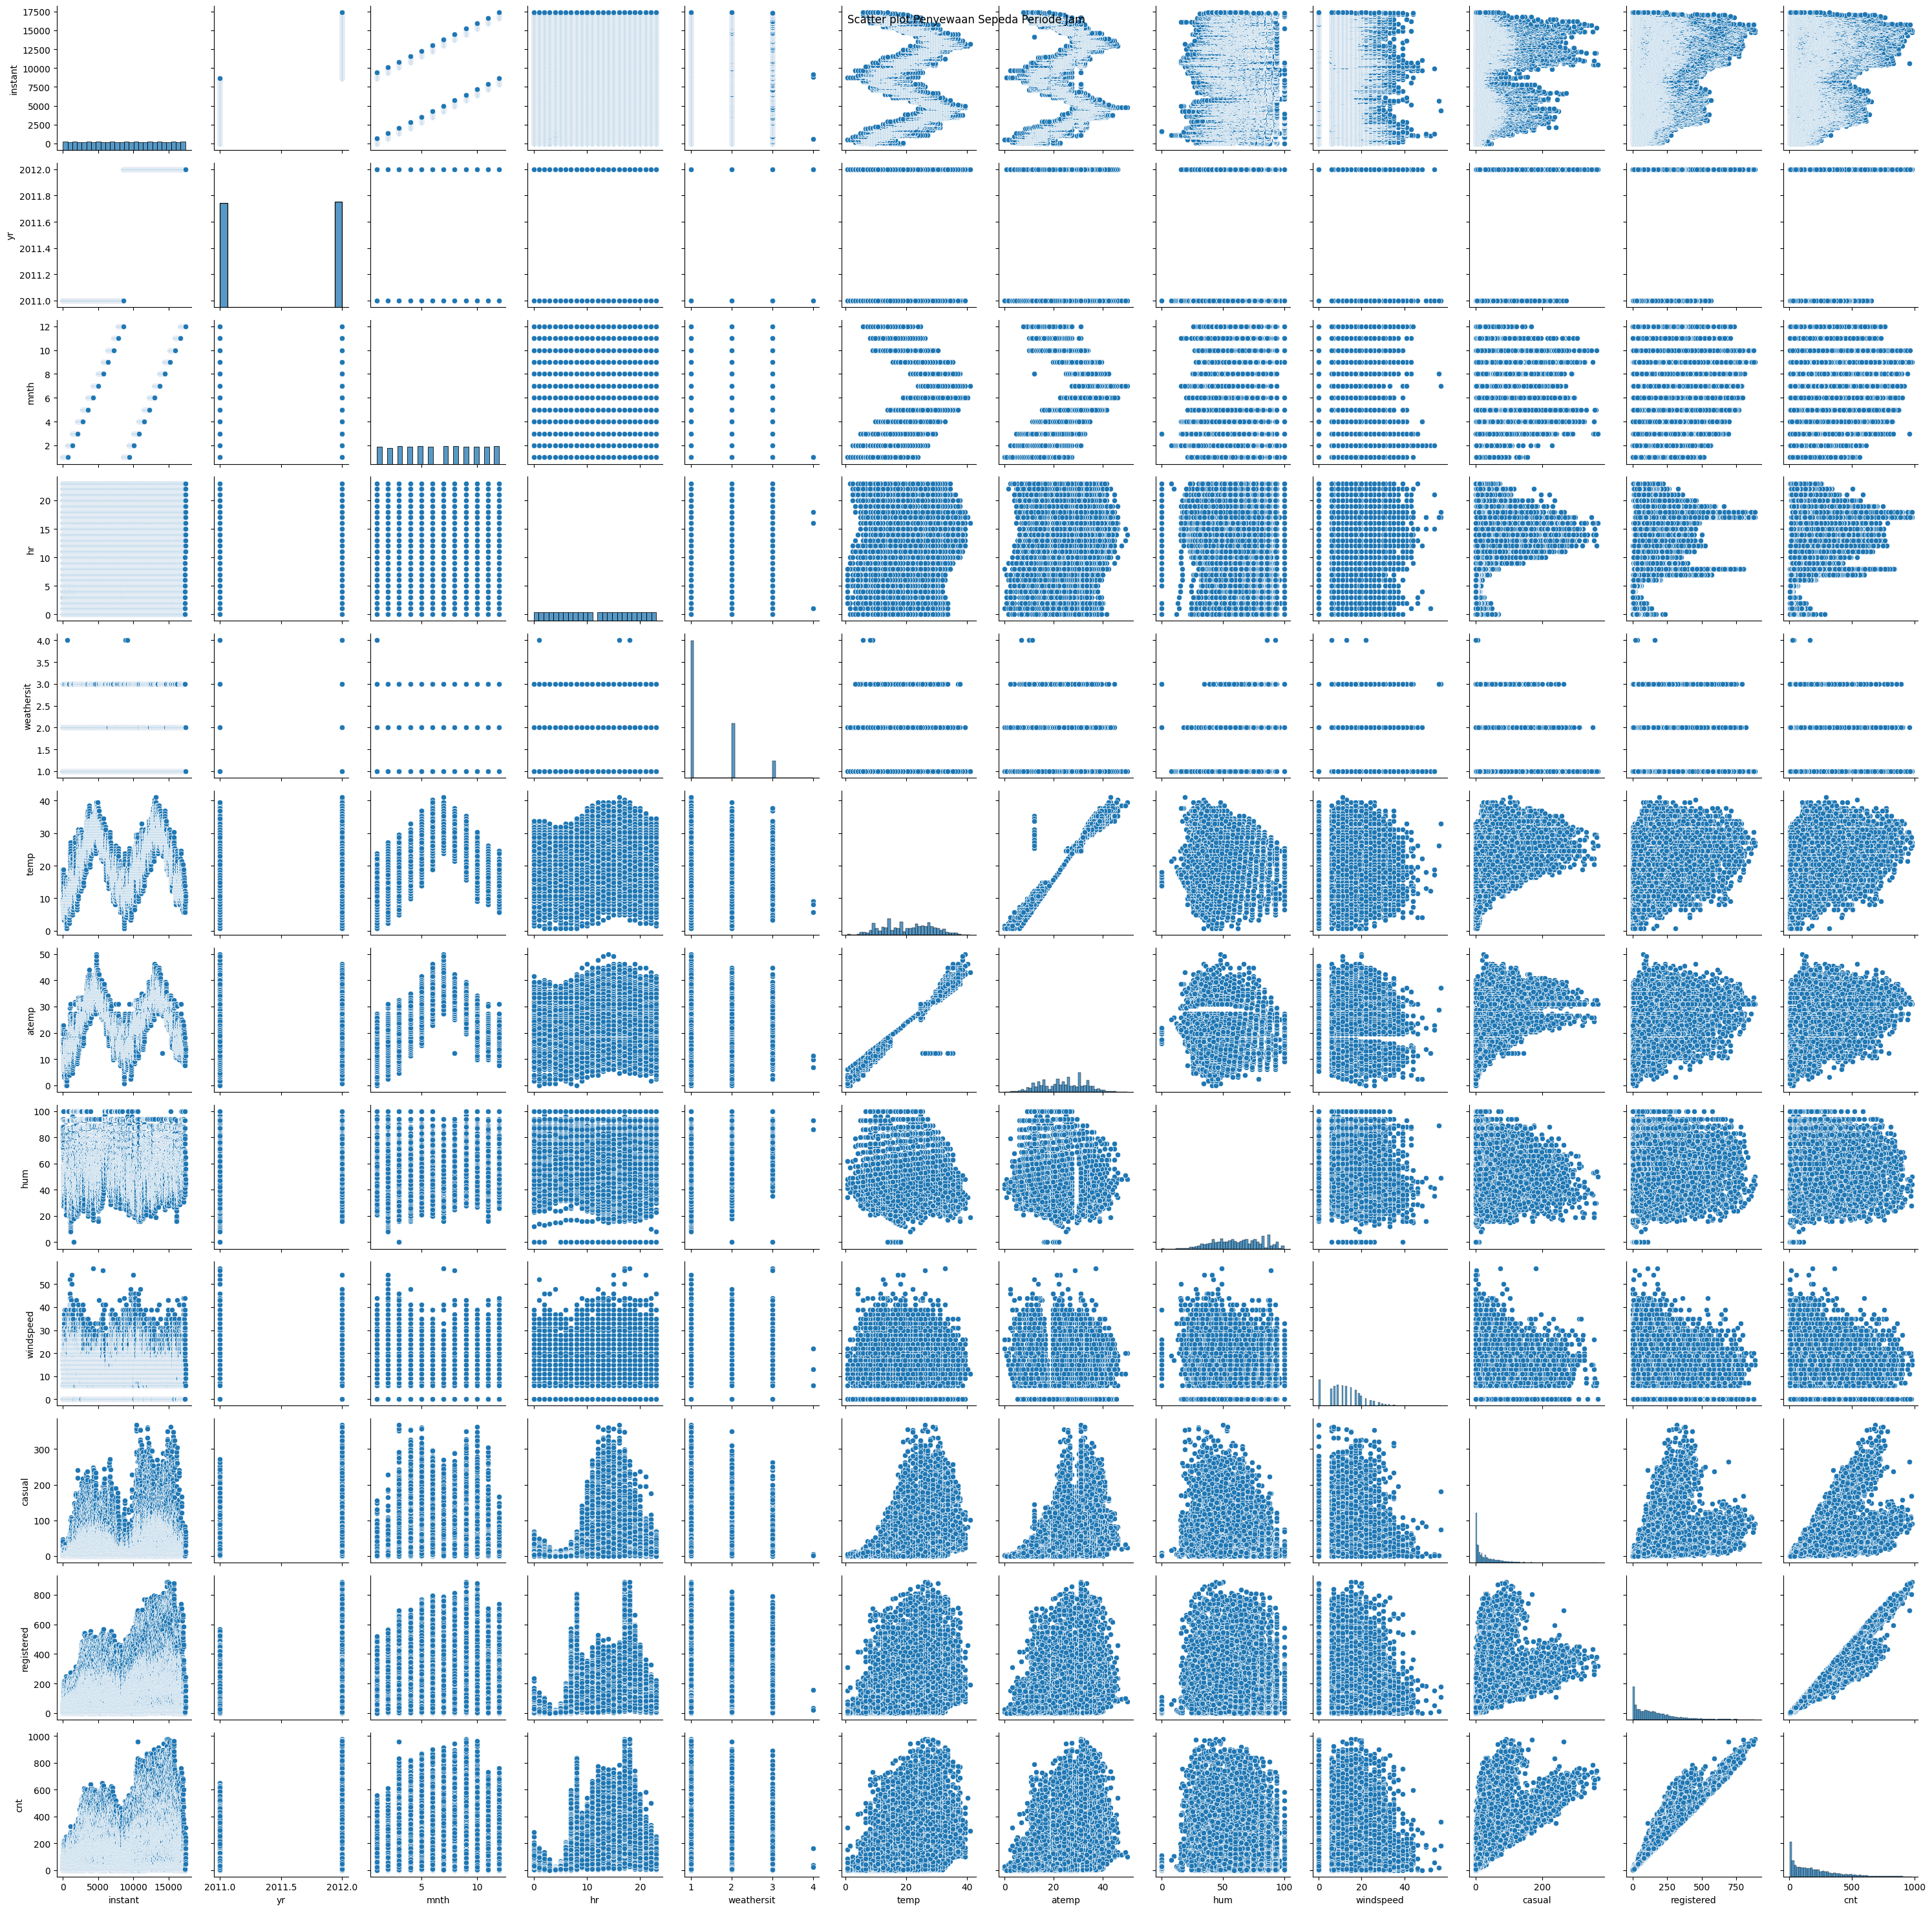

In [ ]:
# Membuat scatter plot
g = sns.pairplot(hour_df)
g.fig.suptitle("Scatter plot Penyewaan Sepeda Periode Jam")
plt.tight_layout()
plt.show()

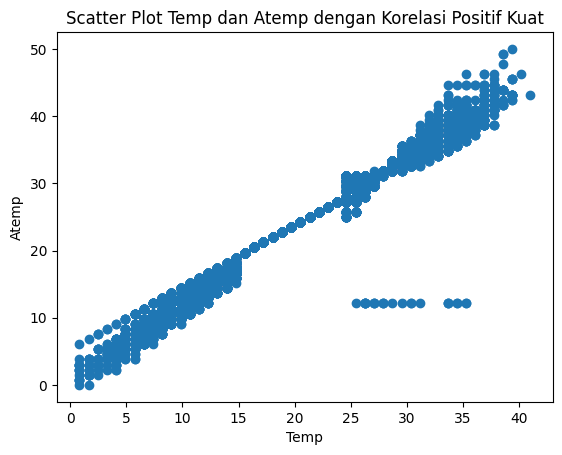

In [ ]:
# Scatter plot variabel Temp dan Attempt dengan korelasi positive kuat
plt.scatter(hour_df["temp"], hour_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot Temp dan Atemp dengan Korelasi Positif Kuat")
plt.show()

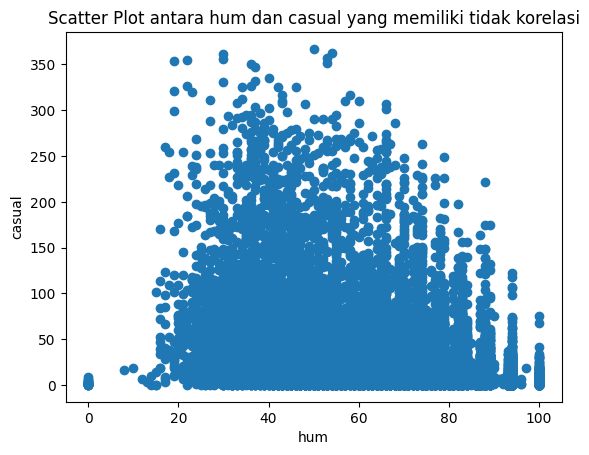

In [ ]:
# Scatter plot varabel yang tidak memiliki korelasi (hum dan casual)
plt.scatter(hour_df["hum"], hour_df["casual"])
plt.xlabel("hum")
plt.ylabel("casual")
plt.title("Scatter Plot antara hum dan casual yang memiliki tidak korelasi")
plt.show()

## **Visualization & Explanatory Analysis**

### Pertanyaan 1:Bagaimana pola tren penyewaan sepeda setiap bulan dan tahunnya?

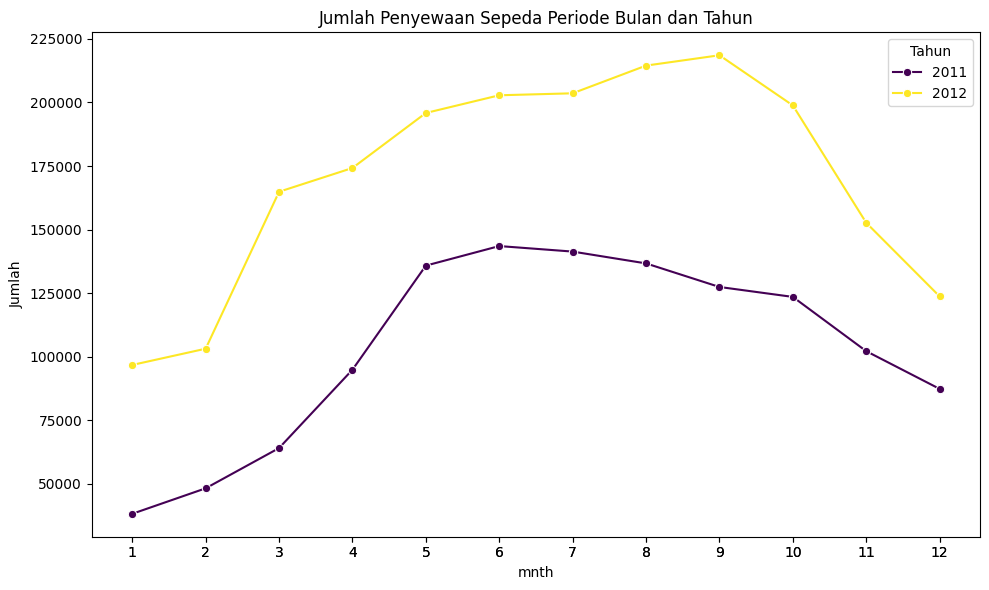

In [ ]:
perbulan = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=perbulan, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah Penyewaan Sepeda Periode Bulan dan Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=perbulan["mnth"], labels=perbulan["mnth"])
plt.tight_layout()
plt.show()

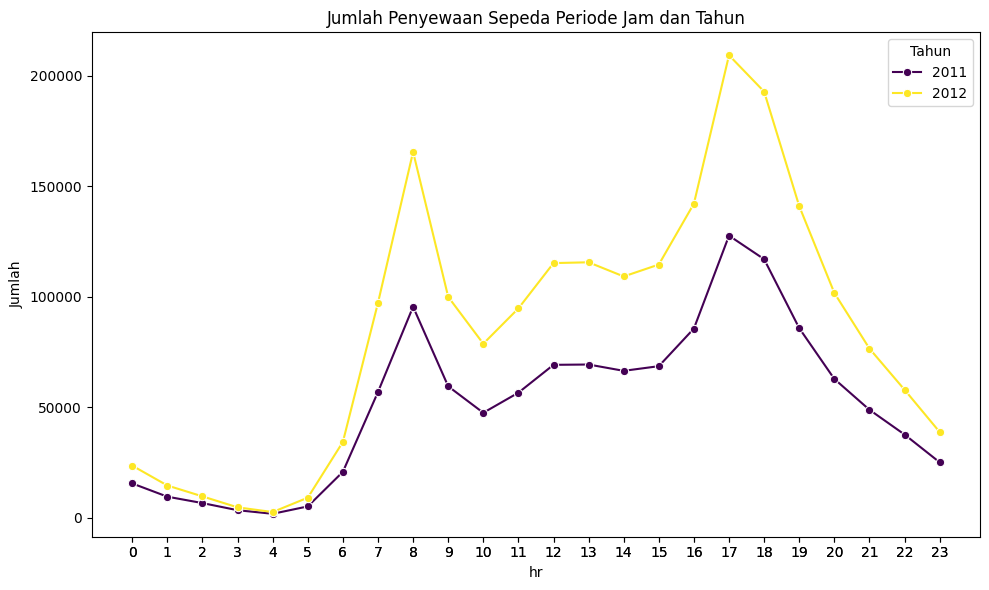

In [ ]:
perjam = hour_df.groupby(by=["hr","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=perjam, x="hr", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah Penyewaan Sepeda Periode Jam dan Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=perjam["hr"], labels=perjam["hr"])
plt.tight_layout()
plt.show()

### Pertanyaan 2: Seberapa banyak jumlah total sepeda yang disewakan setiap musimnya?

**Berdasarkan Hitungan Harian**

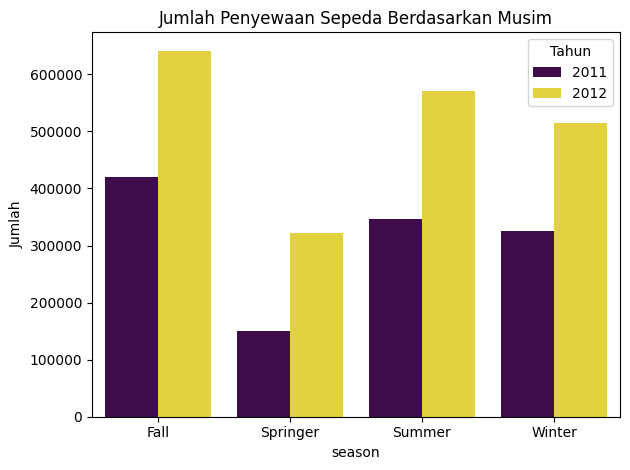

In [ ]:
permusim = day_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=permusim, x="season", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

**Berdasarkan Hitungan Jam**

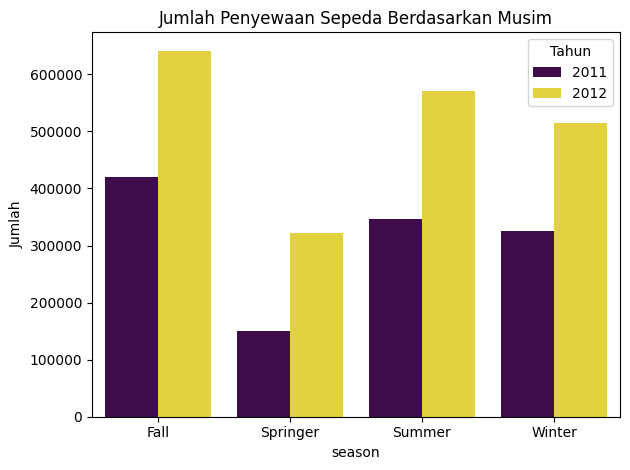

In [ ]:
permusim = hour_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=permusim, x="season", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

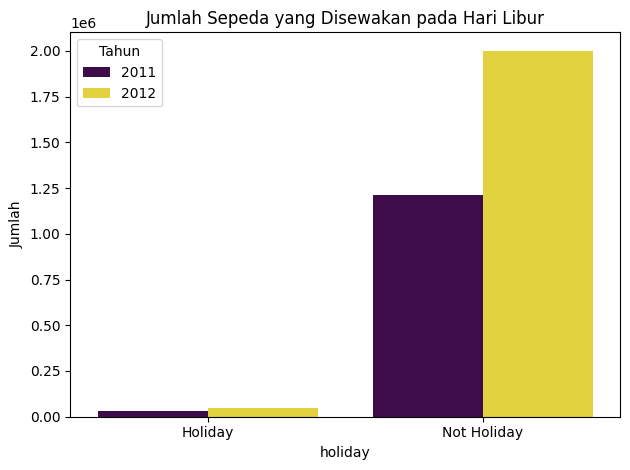

In [ ]:
holiday_counts = day_df.groupby(by=["holiday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=holiday_counts, x="holiday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah Sepeda yang Disewakan pada Hari Libur")
plt.legend(title="Tahun", loc="upper left")
plt.tight_layout()
plt.show()

## Conclusion

- Berdasarkan hasil analisis dan visualisasi data di atas, yakni pada grafik Jumlah Penyewaan Sepeda Periode Bulanan diperoleh informasi bahwa grafik tersebut membentuk pola trend yang fluktuatif (naik, turun). Terlihat bahwa pada tahun 2012 jumlah penyewaan paling banyak ada di bulan September dan yang paling sedikit terdapat pada bulan Januari. Sedangkan pada tahun 2011, penyewaan paling banyak jatuh pada bulan Juni dan paling sedikit ada di bulan Januari.
- Berdasarkan bar chart visualisasi data Jumlah Penyewaan Sepeda Berdasarkan Musim, terlihat bahwa pada tahun 2011 dan 2012 jumlah penyewaan paling banyak terdapat pada musim gugur atau fall, sedangkan penyewaan paling sedikit jatuh pada musim semi atua springer.
- Berdasarkan visualisasi data di atas, terlihat bahwa penyewaan sepeda lebih banyak dilakukan pada saat hari kerja dibandingkan dengan hari libur.

# **Export Dataset**

Selanjutnya kita akan mengekspor dataset di atas yang sudah melalui proses pembersihan untuk digunakan pada Streamlit.

In [ ]:
day_df.to_csv("day_df.csv", index=False)